# Regression

## Loading the dataset

In [2]:
import pandas as pd

df = pd.read_csv("final_cleaned_oscars.csv")
df.head()

,Year,Category,Film,Film_ID,Nominee,Winner,TMDb_ID,Popularity,Vote_Average,Genres,Director,IMDb_Rating
0,1972,Best Cinematography,1776,tt0068156,"Harry Stradling, Jr.",False,14902,6.8,6.8,"Drama, History, Musical",Peter H. Hunt,7.2
1,2019,Best Cinematography,1917,tt8579674,Roger Deakins,True,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
2,2019,Best Director,1917,tt8579674,Sam Mendes,False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
3,2019,Best Picture,1917,tt8579674,"Sam Mendes, Pippa Harris, Jayne-Ann Tenggren a...",False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
4,2019,Best Original Screenplay,1917,tt8579674,Written by Sam Mendes & Krysty Wilson-Cairns,False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2


## Selecting and Cleaning Features

In [12]:
df_clean = df.dropna(subset=['Popularity', 'Vote_Average', 'IMDb_Rating', 'Genres', 'Director', 'Winner'])

df_clean = df_clean[['Popularity', 'Vote_Average', 'IMDb_Rating', 'Genres', 'Director', 'Winner']]

df_clean = df_clean[df_clean['Winner'].isin([0, 1])]

df_clean.to_csv('df_cleaned.csv', index=False)

## Encoding Categorical Variables

In [13]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()

# Encode 'Genres' and 'Director'
le_genres = LabelEncoder()
le_director = LabelEncoder()

df_encoded['Genres'] = le_genres.fit_transform(df_encoded['Genres'])
df_encoded['Director'] = le_director.fit_transform(df_encoded['Director'])

df_encoded.to_csv('df_encoded.csv', index=False)
df_encoded.head()

,Popularity,Vote_Average,IMDb_Rating,Genres,Director,Winner
0,6.8,6.8,7.2,173,562,False
1,46.0,8.0,8.2,30,656,True
2,46.0,8.0,8.2,30,656,False
3,46.0,8.0,8.2,30,656,False
4,46.0,8.0,8.2,30,656,False


## Splitting and Balancing the Data with SMOTENC

In [9]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

# Separate features and target
X = df_encoded.drop('Winner', axis=1)
y = df_encoded['Winner']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Indices of categorical columns ('Genres', 'Director')
cat_features = [3, 4]

# Apply SMOTENC to training set
sm = SMOTENC(categorical_features=cat_features, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTENC - Train shape:", X_train_res.shape)


After SMOTENC - Train shape: (4652, 5)


## Saving the datasets

In [14]:
import pandas as pd

# Assuming X_train_res, X_test, y_train_res, y_test are your datasets

# Convert y_train_res and y_test to DataFrame to facilitate saving
y_train_res_df = pd.DataFrame(y_train_res, columns=['Winner'])
y_test_df = pd.DataFrame(y_test, columns=['Winner'])

# Save the training datasets
X_train_res.to_csv('X_train_res.csv', index=False)
y_train_res_df.to_csv('y_train_res.csv', index=False)

# Save the testing datasets
X_test.to_csv('X_test.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

print("Datasets have been saved successfully.")

Datasets have been saved successfully.


## Training and Evaluating Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_log = log_model.predict(X_test)

log_acc = accuracy_score(y_test, y_pred_log)
log_cm = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log, target_names=labels)

print("Logistic Regression")
print(f"Accuracy: {log_acc:.2f}")
print("Confusion Matrix:\n", log_cm)
print("Classification Report:\n", class_report)

Logistic Regression
Accuracy: 0.57
Confusion Matrix:
 [[557 441]
 [ 93 145]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.56      0.68       998
    Positive       0.25      0.61      0.35       238

    accuracy                           0.57      1236
   macro avg       0.55      0.58      0.51      1236
weighted avg       0.74      0.57      0.61      1236



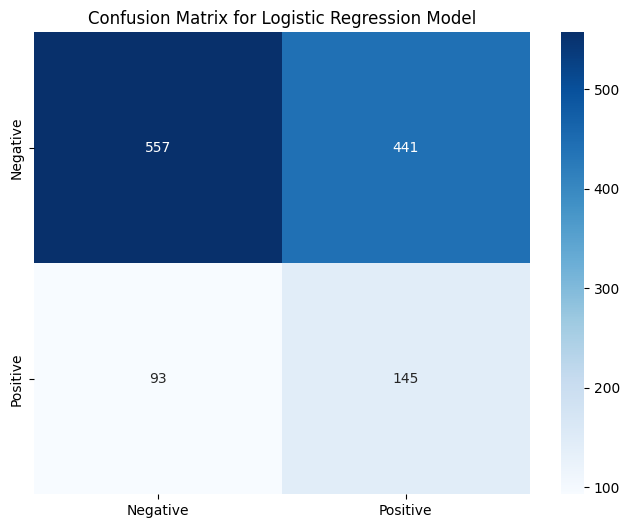

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_log)

# Define the labels for the classes
labels = ['Negative', 'Positive']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

## Multinomial Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train_nb = X_train_res - X_train_res.min()
X_test_nb = X_test - X_train_res.min()
nb_model = MultinomialNB()
nb_model.fit(X_train_nb, y_train_res)

y_pred_nb = nb_model.predict(X_test_nb)

nb_acc = accuracy_score(y_test, y_pred_nb)
nb_cm = confusion_matrix(y_test, y_pred_nb)
nb_cr = classification_report(y_test, y_pred_nb, target_names=['Class 0', 'Class 1'])

print("Multinomial Naive Bayes")
print(f"Accuracy: {nb_acc:.2f}")
print("Confusion Matrix:\n", nb_cm)
print("Classification Report:\n", nb_cr)

Multinomial Naive Bayes
Accuracy: 0.52
Confusion Matrix:
 [[523 475]
 [122 116]]
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.81      0.52      0.64       998
     Class 1       0.20      0.49      0.28       238

    accuracy                           0.52      1236
   macro avg       0.50      0.51      0.46      1236
weighted avg       0.69      0.52      0.57      1236



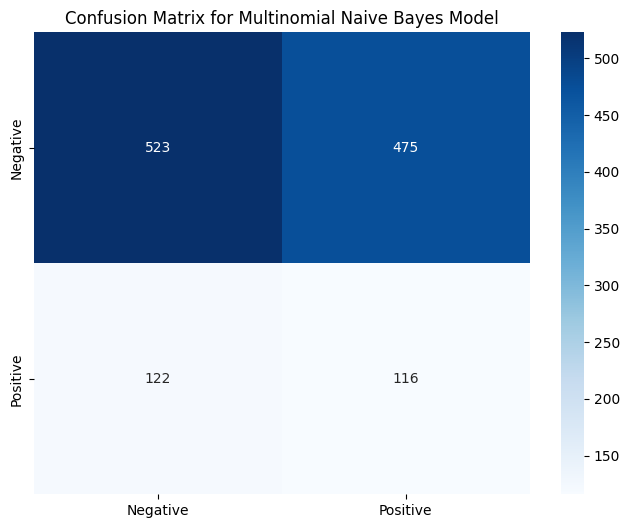

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
nb_cm = confusion_matrix(y_test, y_pred_nb)

class_labels = ['Negative', 'Positive']

plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix for Multinomial Naive Bayes Model')
plt.show()

## Comparison of Logistic Regression vs Multinomial Naive Bayes

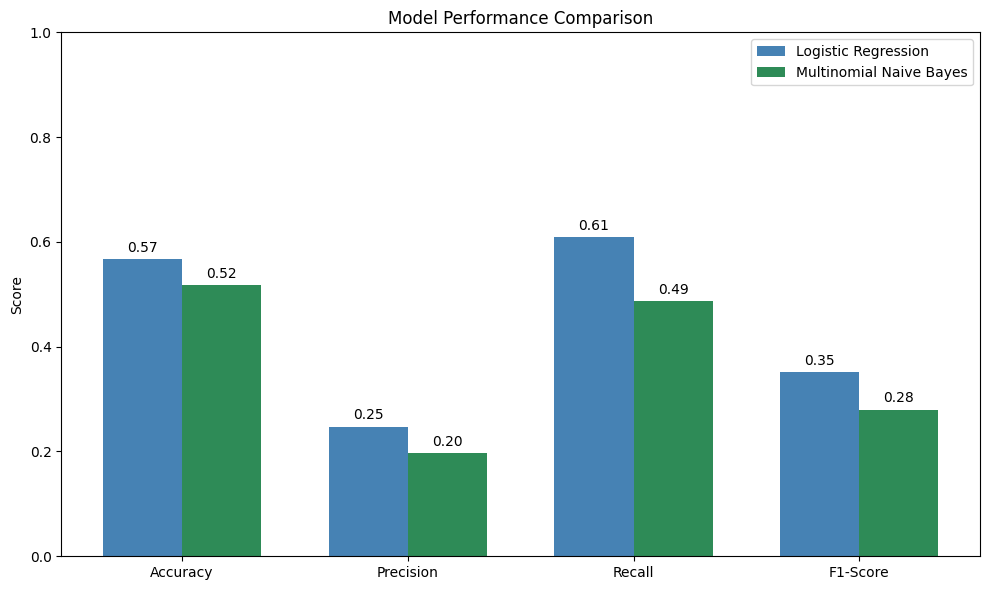

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Get metrics for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Logistic Regression metrics
log_metrics = [
    accuracy_score(y_test, y_pred_log),
    precision_score(y_test, y_pred_log),
    recall_score(y_test, y_pred_log),
    f1_score(y_test, y_pred_log)
]

# Multinomial Naive Bayes metrics
nb_metrics = [
    accuracy_score(y_test, y_pred_nb),
    precision_score(y_test, y_pred_nb),
    recall_score(y_test, y_pred_nb),
    f1_score(y_test, y_pred_nb)
]

# Bar chart
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, log_metrics, width, label='Logistic Regression', color='steelblue')
bars2 = ax.bar(x + width/2, nb_metrics, width, label='Multinomial Naive Bayes', color='seagreen')

# Add labels and legend
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Add text on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()